In [ ]:
%%capture
!pip install pydotplus
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv("heart.csv")
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Verificando dataset
pd.set_option('display.expand_frame_repr', False)
print("\nDimensões: {0}".format(dados.shape))
print("\nInfo: {0}".format(dados.info()))
print("\nCampos: {0}".format(dados.keys()))
print("\n",dados.describe().T, sep='\n')
print("\nDados Categoricos:\n",dados.select_dtypes(include='object').describe().T)


Dimensões: (918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Info: None

Campos: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'H

In [ ]:
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
print('Correlação:')
dados.corr()

Correlação:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


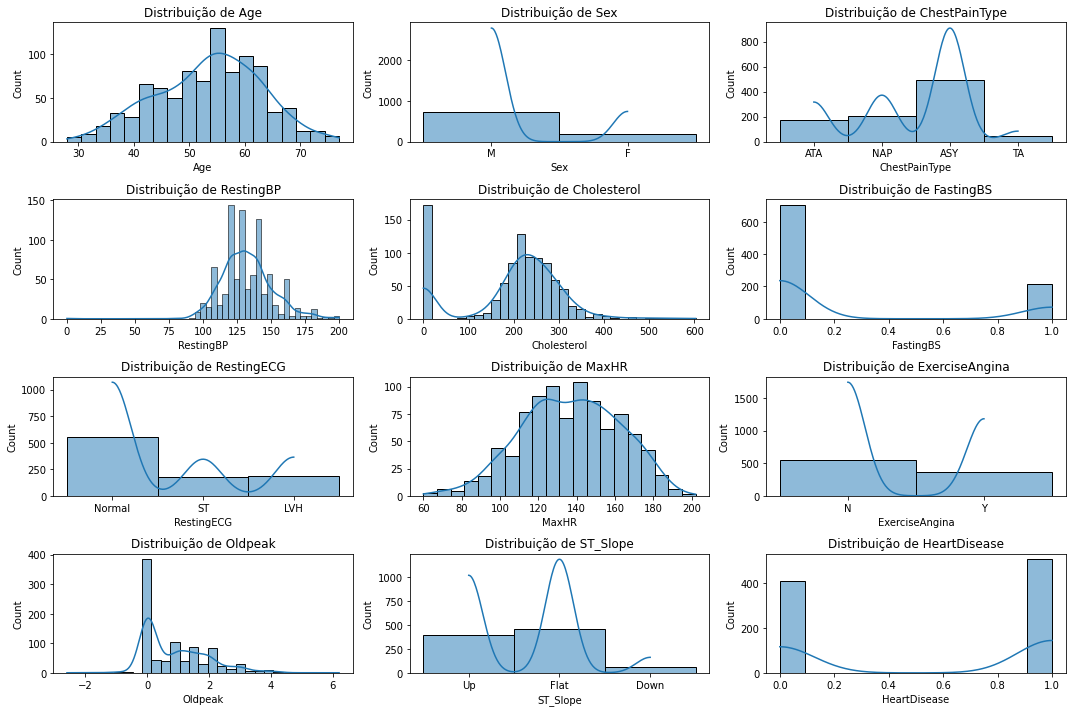

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(dados.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribuição de {col}")
    sns.histplot(dados[col],kde=True)
    plt.tight_layout()
    plt.plot()

##Obtenção dos datasets para treino e teste



In [ ]:
#obtendo subset dos dados para treino em forma de dict
x = dados.iloc[:,0:dados.shape[1]-1].T.to_dict().values()
x

dict_values([{'Age': 40, 'Sex': 'M', 'ChestPainType': 'ATA', 'RestingBP': 140, 'Cholesterol': 289, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 172, 'ExerciseAngina': 'N', 'Oldpeak': 0.0, 'ST_Slope': 'Up'}, {'Age': 49, 'Sex': 'F', 'ChestPainType': 'NAP', 'RestingBP': 160, 'Cholesterol': 180, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 156, 'ExerciseAngina': 'N', 'Oldpeak': 1.0, 'ST_Slope': 'Flat'}, {'Age': 37, 'Sex': 'M', 'ChestPainType': 'ATA', 'RestingBP': 130, 'Cholesterol': 283, 'FastingBS': 0, 'RestingECG': 'ST', 'MaxHR': 98, 'ExerciseAngina': 'N', 'Oldpeak': 0.0, 'ST_Slope': 'Up'}, {'Age': 48, 'Sex': 'F', 'ChestPainType': 'ASY', 'RestingBP': 138, 'Cholesterol': 214, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 108, 'ExerciseAngina': 'Y', 'Oldpeak': 1.5, 'ST_Slope': 'Flat'}, {'Age': 54, 'Sex': 'M', 'ChestPainType': 'NAP', 'RestingBP': 150, 'Cholesterol': 195, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 122, 'ExerciseAngina': 'N', 'Oldpeak': 0.0, 'ST_Slope': 'Up'}

In [ ]:
y = dados.iloc[:,(dados.shape[1] - 1)]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

##Transformação de dados



In [ ]:
#transformação da base de treino
vect = DictVectorizer(sparse=False)

X_vect = vect.fit_transform(x)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento apos binarizacao (dummies): {0}".format(X_vect.shape))
X_vect

Shape do dado de treinamento apos binarizacao (dummies): (918, 20)


array([[40.,  0.,  1., ...,  1.,  0.,  1.],
       [49.,  0.,  0., ...,  0.,  1.,  0.],
       [37.,  0.,  1., ...,  1.,  0.,  1.],
       ...,
       [57.,  1.,  0., ...,  0.,  0.,  1.],
       [57.,  0.,  1., ...,  0.,  1.,  0.],
       [38.,  0.,  0., ...,  1.,  0.,  1.]])

##Particionamento dos dados para treino e teste


In [ ]:
# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, random_state=0, test_size=0.2)

##Criação do modelo

In [ ]:
heart_tree = DecisionTreeClassifier(random_state=0, criterion='gini')
heart_tree = heart_tree.fit(X_train, y_train)

##Visualização do modelo


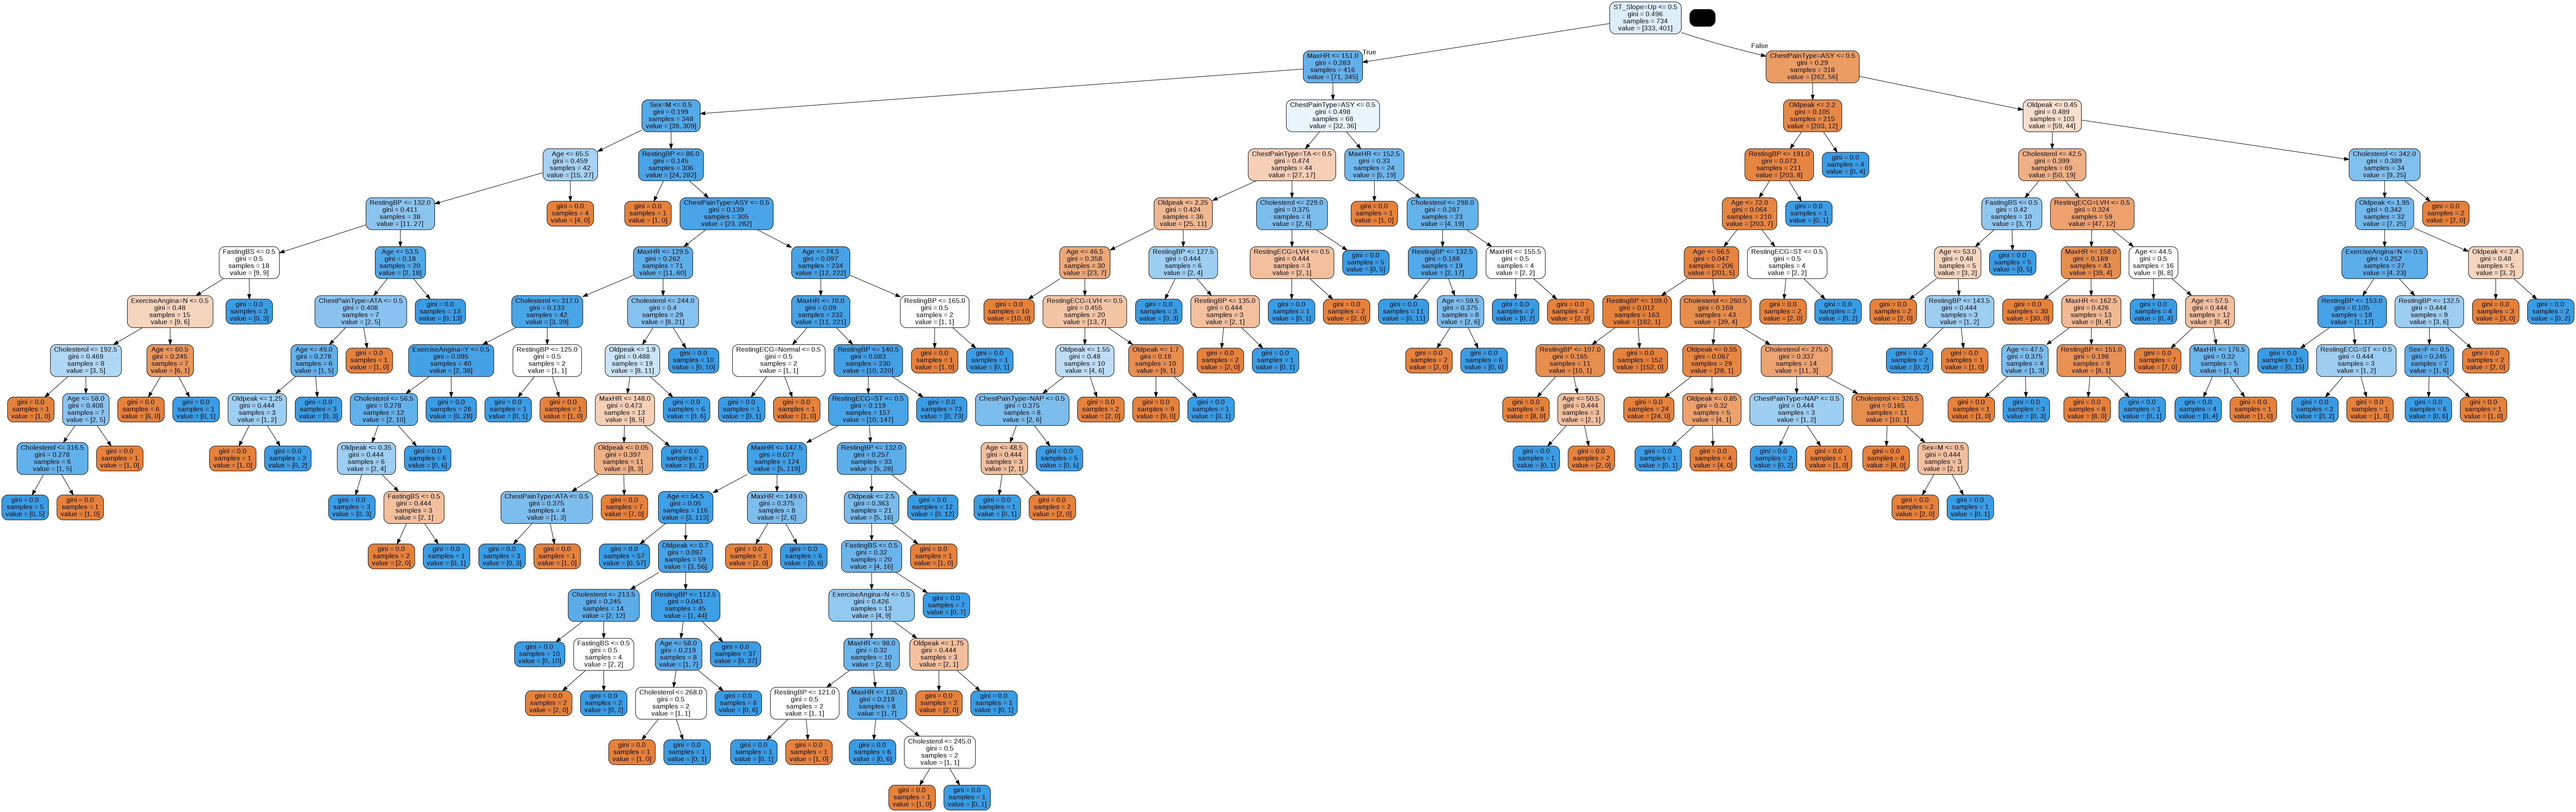

In [ ]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(heart_tree, out_file=None, 
                                feature_names=vect.feature_names_,
                                rounded =True,
                                filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

##Verificação da aplicabilidade do modelo

In [ ]:
score_treino = heart_tree.score(X_train, y_train)
print("Acurácia (base de treinamento):",score_treino )

Acurácia (base de treinamento): 1.0


In [ ]:
y_pred = heart_tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
score_teste = accuracy_score(y_test, y_pred)
print("Acurácia (base de teste):",score_teste )

Acurácia (base de teste): 0.7445652173913043


In [ ]:
if score_treino > score_teste:
    print('Modelo com overfitting')
  

Modelo com overfitting


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        77
           1       0.84      0.69      0.76       107

    accuracy                           0.74       184
   macro avg       0.75      0.75      0.74       184
weighted avg       0.76      0.74      0.75       184



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix)
print(cnf_table)

    0   1
0  63  14
1  33  74


##Verificando otimizações para executar o modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from time import time

In [ ]:
tree_params = {"max_depth": np.arange(2, 7),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.arange(2, 7),
               "min_samples_leaf": np.arange(2, 7),
               }

In [ ]:
# Executa randomized search
n_iter_search = 20

random_search = RandomizedSearchCV(heart_tree, # modelo
                                   param_distributions=tree_params,
                                   n_iter=n_iter_search, 
                                   cv=5,  
                                   random_state=0)

In [ ]:
start = time()

random_search.fit(X_train, y_train)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings \n\n" % ((time() - start), n_iter_search))


RandomizedSearchCV took 0.53 seconds for 20 candidates parameter settings 




In [ ]:
random_search.cv_results_

{'mean_fit_time': array([0.0064868 , 0.00394878, 0.00378437, 0.00339251, 0.00323887,
        0.00309229, 0.00401788, 0.00365839, 0.00314369, 0.00325842,
        0.00590372, 0.00466037, 0.00462332, 0.00308046, 0.00255995,
        0.0022902 , 0.00292974, 0.00163255, 0.00206089, 0.0022872 ]),
 'mean_score_time': array([0.00112529, 0.0009223 , 0.00103407, 0.00080743, 0.00075192,
        0.00079603, 0.00096984, 0.00088449, 0.00091701, 0.00086417,
        0.00108137, 0.0009397 , 0.00104389, 0.0007051 , 0.00060515,
        0.00054507, 0.00055623, 0.00048432, 0.00051484, 0.00053806]),
 'mean_test_score': array([0.83915758, 0.82284969, 0.82829186, 0.85284689, 0.85284689,
        0.85011648, 0.8433324 , 0.82554282, 0.82695928, 0.85284689,
        0.84465567, 0.83781567, 0.8119467 , 0.84196254, 0.82148914,
        0.83377132, 0.85010717, 0.81882397, 0.85284689, 0.82829186]),
 'param_criterion': masked_array(data=['entropy', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'ent

In [ ]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=4, random_state=0)

In [ ]:
print("Acurácia de treinamento:", random_search.best_estimator_.score(X_train, y_train))

y_pred = random_search.best_estimator_.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia de treinamento: 0.8719346049046321
Acurácia de previsão: 0.8206521739130435


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        77
           1       0.82      0.88      0.85       107

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix,columns=heart_tree.classes_,index=heart_tree.classes_)
print(cnf_table)

    0   1
0  57  20
1  13  94


In [ ]:
a = 33/184
print('misclassification: ',a)

misclassification:  0.1793478260869565


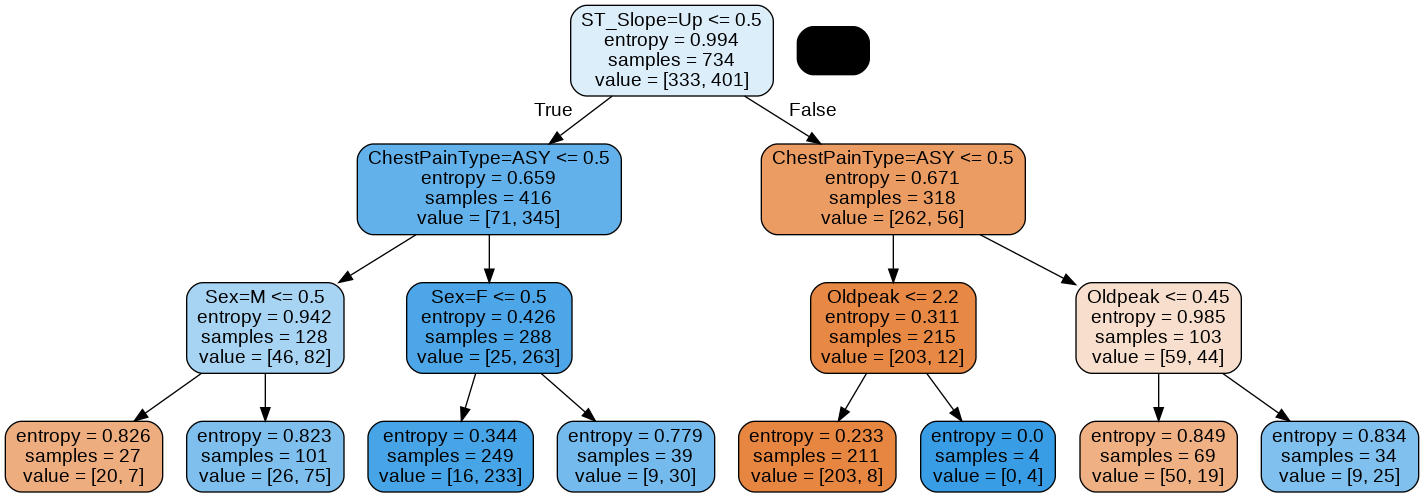

In [ ]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(random_search.best_estimator_, out_file=None, 
                                feature_names=vect.feature_names_,
                                rounded =True,
                                filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())